In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
data = pd.read_excel(r'wheat.xlsx')
data.head(10)

,行政区划代码,地区,年份,小麦播种面积/千公顷,小麦产量/万吨,人均GDP/元,居民消费价格指数(上年＝100),平均出售价格
0,130000,河北省,2010,2420.3,1230.6,25308,103.0740,103.28
1,140000,山西省,2010,728.5,232.2,25434,103.0185,102.73
2,150000,内蒙古自治区,2010,566.2,165.2,33262,103.2023,115.45
3,230000,黑龙江省,2010,280.0,92.5,21694,103.8951,91.46
4,320000,江苏省,2010,2093.1,1008.1,52787,103.8132,95.72
5,340000,安徽省,2010,2365.7,1206.7,21923,103.1392,93.71
6,370000,山东省,2010,3561.9,2058.6,35599,102.9347,102.32
7,410000,河南省,2010,5280.0,3082.2,23984,103.5284,96.74
8,420000,湖北省,2010,1000.1,343.1,28359,102.9134,90.48
9,510000,四川省,2010,1265.7,427.7,21230,103.1787,101.78


In [3]:
# 取2010-2017年的数据做训练集
Train_data = data[data['年份']<2018]
display(Train_data)

# 取2018年的数据做测试集
Test_data = data[data['年份'] == 2018]
Test_data

,行政区划代码,地区,年份,小麦播种面积/千公顷,小麦产量/万吨,人均GDP/元,居民消费价格指数(上年＝100),平均出售价格
0,130000,河北省,2010,2420.3,1230.6,25308,103.0740,103.28
1,140000,山西省,2010,728.5,232.2,25434,103.0185,102.73
2,150000,内蒙古自治区,2010,566.2,165.2,33262,103.2023,115.45
3,230000,黑龙江省,2010,280.0,92.5,21694,103.8951,91.46
4,320000,江苏省,2010,2093.1,1008.1,52787,103.8132,95.72
...,...,...,...,...,...,...,...,...
115,530000,云南省,2017,343.7,73.7,38629,100.9498,116.72
116,610000,陕西省,2017,963.1,406.4,56154,101.6374,108.83
117,620000,甘肃省,2017,766.5,269.7,28026,101.3898,113.14
118,640000,宁夏回族自治区,2017,123.1,37.8,47177,101.5916,129.42


,行政区划代码,地区,年份,小麦播种面积/千公顷,小麦产量/万吨,人均GDP/元,居民消费价格指数(上年＝100),平均出售价格
120,130000,河北省,2018,2357.2,1450.7,43108,102.4489,118.98
121,140000,山西省,2018,560.3,228.6,43010,101.7931,118.00
122,150000,内蒙古自治区,2018,596.7,202.3,63772,101.8227,153.73
123,320000,江苏省,2018,2404.0,1289.1,115930,102.3104,108.72
124,340000,安徽省,2018,2875.9,1607.5,54078,101.9834,103.28
125,370000,山东省,2018,4058.6,2471.7,66472,102.4536,119.29
126,410000,河南省,2018,5739.9,3602.9,52114,102.2525,103.96
127,420000,湖北省,2018,1105.0,410.4,71109,101.9498,75.95
128,510000,四川省,2018,635.0,247.3,51556,101.7361,114.81
129,530000,云南省,2018,339.2,74.3,43366,101.5754,119.95


In [4]:
X_train = Train_data[['小麦播种面积/千公顷','小麦产量/万吨','人均GDP/元','居民消费价格指数(上年＝100)']]
y_train = Train_data[['平均出售价格']]

X_test = Test_data[['小麦播种面积/千公顷','小麦产量/万吨','人均GDP/元','居民消费价格指数(上年＝100)']]
y_test = Test_data[['平均出售价格']]

In [5]:
X_train = X_train.values
y_train = y_train.values
n_samples, n_features = X_train.shape

In [6]:
X_test = X_test.values
y_test = y_test.values

In [7]:
x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler = MinMaxScaler(feature_range=(0,1))
X_train = x_scaler.fit_transform(X_train.astype(float))
y_train = y_scaler.fit_transform(y_train.astype(float))

X_test = x_scaler.fit_transform(X_test.astype(float))
y_test = y_scaler.fit_transform(y_test.astype(float))

In [8]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [10]:
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
class BPNetwork(nn.Module):
    def __init__(self, input_size):
        super(BPNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 12)
        self.re1 = nn.ReLU()
        self.fc2 = nn.Linear(12, 1)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.re1(out)
        out = self.fc2(out)
        return out

In [11]:
# 创建多元线性回归模型对象，并定义损失函数和优化器
linear_model = LinearRegression(n_features) # 创建模型对象，输入大小为特征数13 
linear_criterion = nn.MSELoss() # 定义均方误差损失函数 
linear_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.003)

# 创建BP神经网络模型对象，并定义损失函数和优化器 
bp_model = BPNetwork(n_features + 2)  # 创建模型对象，输入大小为特征数加上两个额外的输入（预测值和残差值）
bp_criterion=nn.MSELoss()  # 定义均方误差损失函数 
bp_optimizer=torch.optim.SGD(bp_model.parameters(), lr=0.03)

In [12]:
epochs = 1500
loss_lin = []
for epoch in range(epochs):
    linear_pre = linear_model(X_train)
    linear_loss = linear_criterion(y_train, linear_pre)
    
    # 反向传播和参数更新
    linear_optimizer.zero_grad() # 清空梯度缓存
    linear_loss.backward(retain_graph=True) # 计算梯度retain_graph=True
    linear_optimizer.step() # 更新参数

    if (epoch+1) % 100 == 0: # 每10轮打印一次训练结果
        loss_lin.append(linear_loss.item())
        print(f'Epoch {epoch + 1}, loss: {linear_loss.item():.4f}')

Epoch 100, loss: 0.0885
Epoch 200, loss: 0.0521
Epoch 300, loss: 0.0435
Epoch 400, loss: 0.0407
Epoch 500, loss: 0.0391
Epoch 600, loss: 0.0380
Epoch 700, loss: 0.0370
Epoch 800, loss: 0.0361
Epoch 900, loss: 0.0354
Epoch 1000, loss: 0.0348
Epoch 1100, loss: 0.0342
Epoch 1200, loss: 0.0337
Epoch 1300, loss: 0.0333
Epoch 1400, loss: 0.0329
Epoch 1500, loss: 0.0326


In [13]:
# 测试多元线性回归模型
with torch.no_grad(): # 不计算梯度，节省内存和时间
    linear_pred = linear_model(X_test) # 计算测试集上的预测值
    linear_loss = linear_criterion(linear_pred, y_test) # 计算测试集上的损失值 
    print(f'Test loss: {linear_loss.item():.4f}') # 打印测试结果
# linear_model.get_parameter(fcl)

Test loss: 0.0827


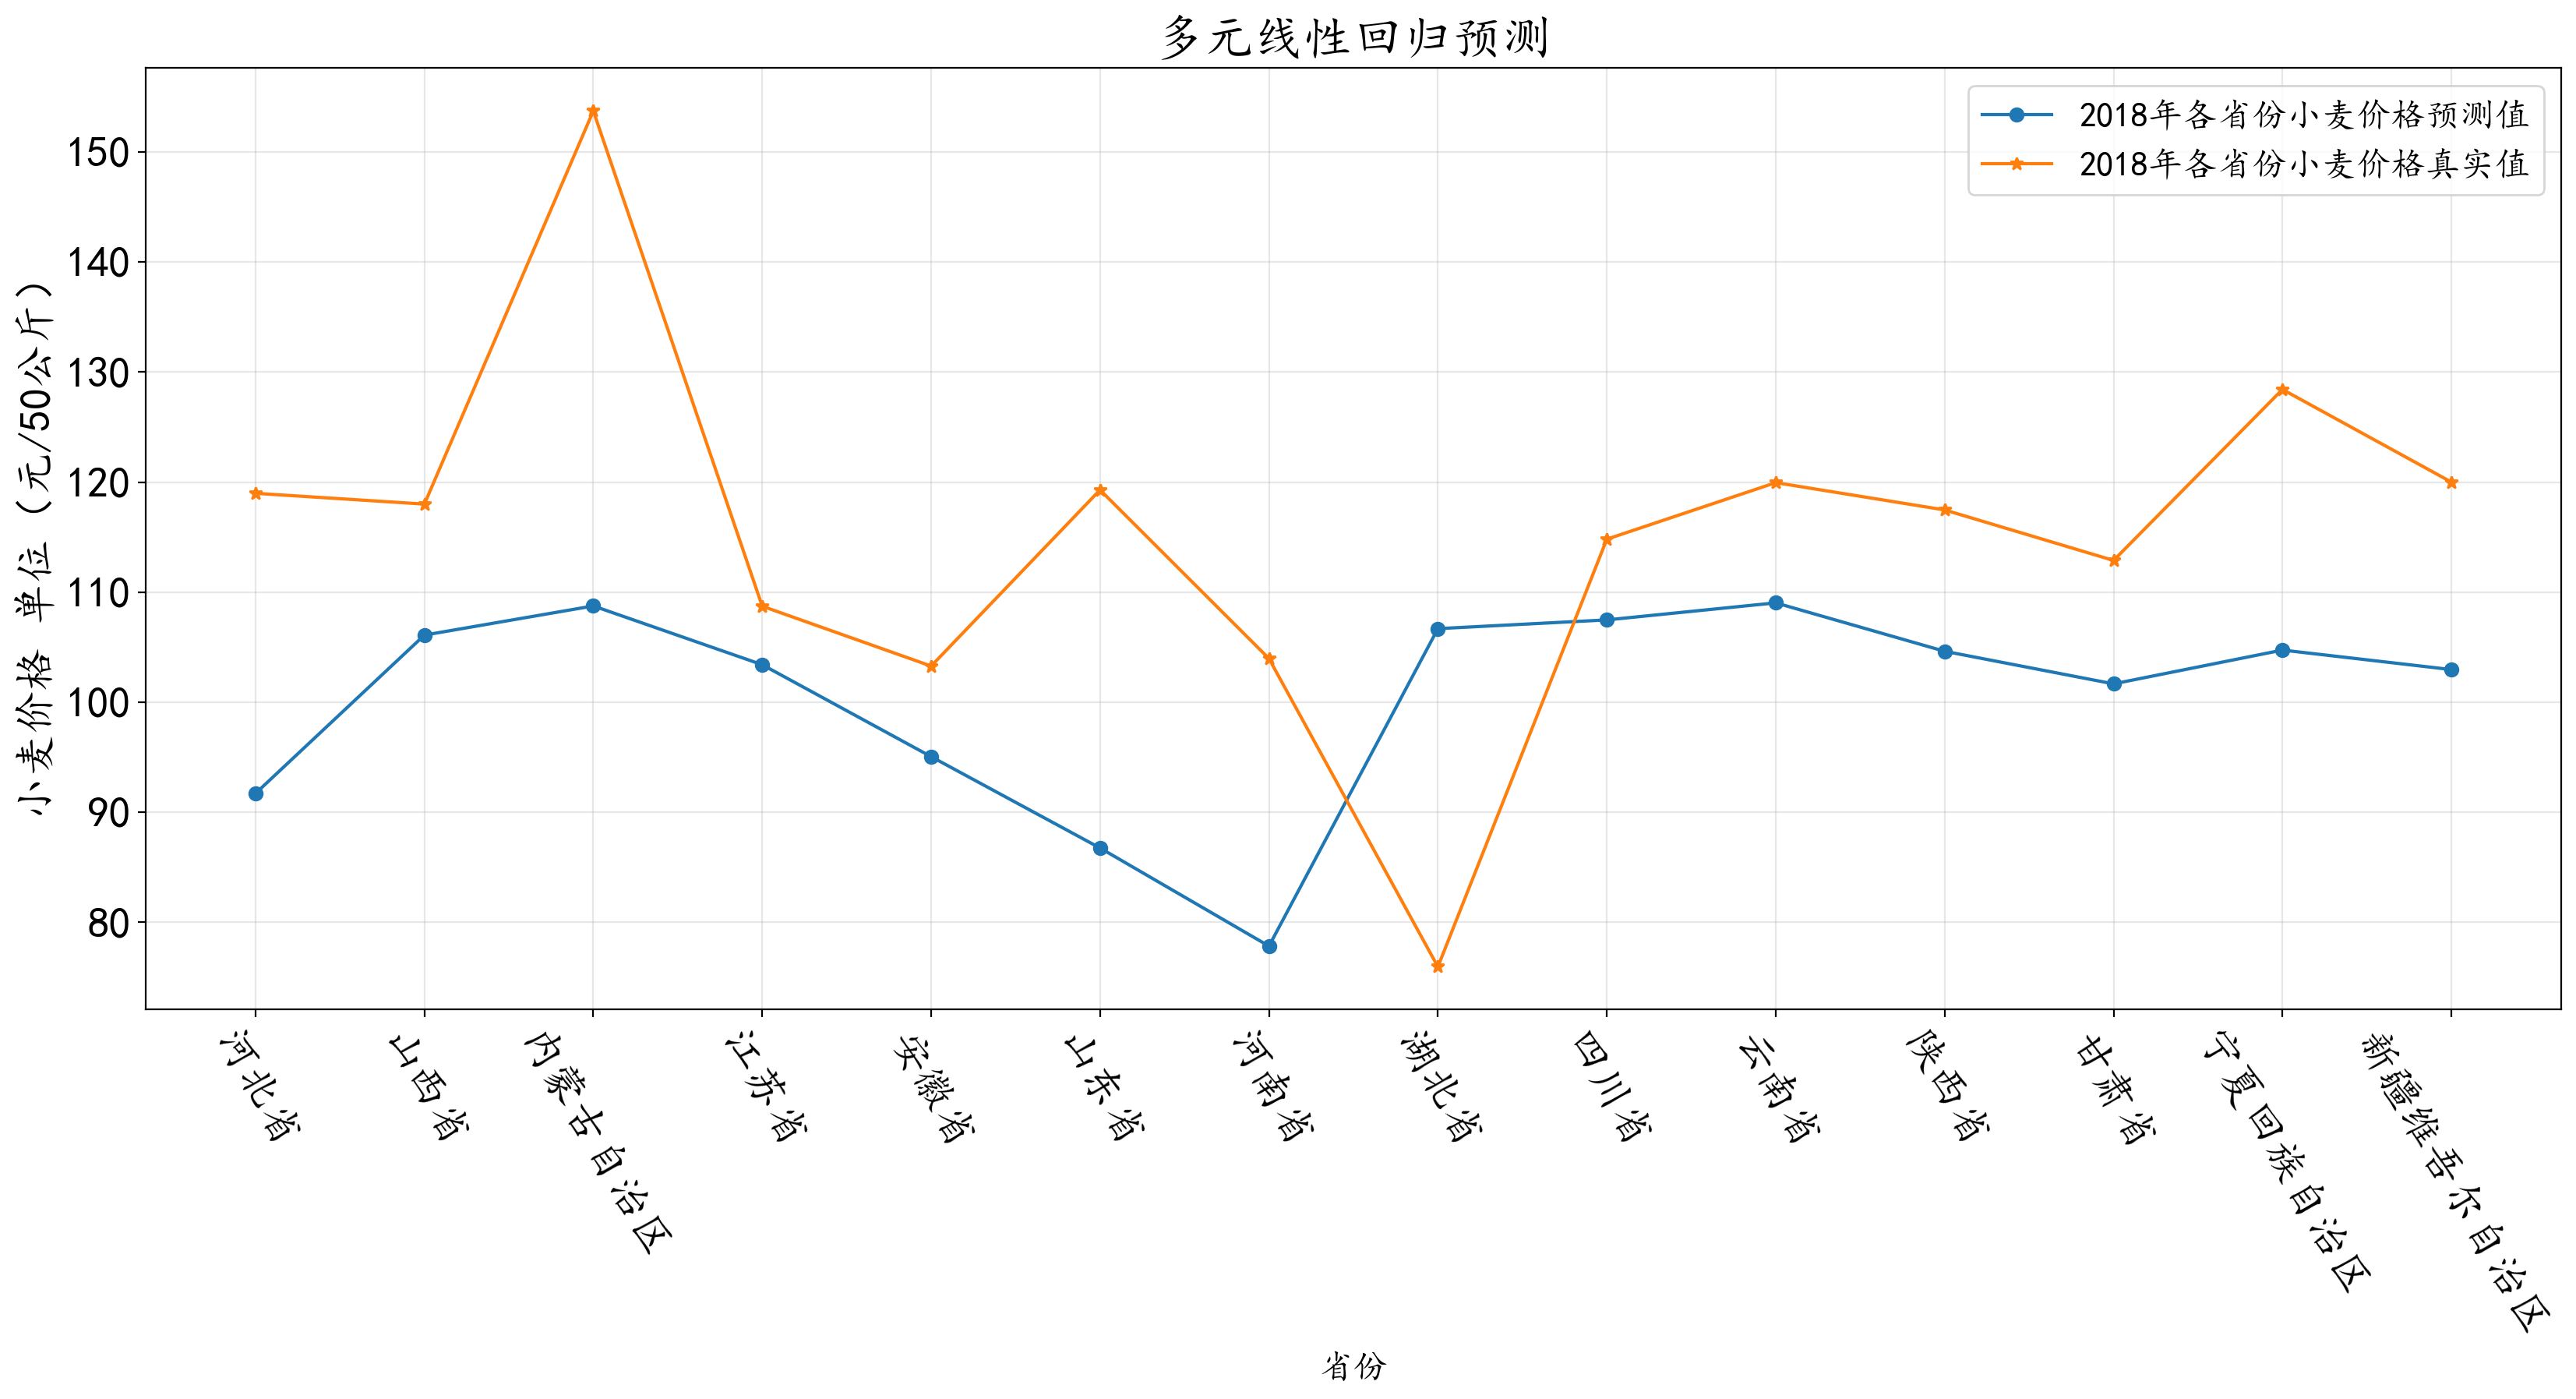

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,8), dpi=120)
plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams['axes.unicode_minus'] = False

a = np.arange(len(y_test))
b = np.arange(len(linear_pred))

plt.plot(a, y_scaler.inverse_transform(linear_pred), marker='o', label='2018年各省份小麦价格预测值')
plt.plot(b, y_scaler.inverse_transform(y_test), marker='*', label='2018年各省份小麦价格真实值')
plt.title('多元线性回归预测', fontsize=23)
plt.legend(fontsize=16)
plt.xticks(range(len(Test_data['地区'].values)), Test_data['地区'].values, fontsize=20, rotation=300)
plt.yticks(fontsize=20)

plt.xlabel("省份",fontsize=16)
plt.ylabel("小麦价格 单位（元/50公斤）", fontsize=20)
plt.grid(alpha=0.3)


# plt.savefig(r"多元回归预测.png",bbox_inches = 'tight')
plt.show()

In [15]:
residuals = y_train - linear_pre

X_train_bp = torch.cat((X_train, linear_pre, residuals), dim=1)

bp_epochs = 1500
loss_bp = []
for epoch in range(bp_epochs):
    bp_pre = bp_model(X_train_bp)
    bp_loss = bp_criterion(bp_pre, y_train)
    
    bp_optimizer.zero_grad()
    bp_loss.backward(retain_graph=True)
    bp_optimizer.step()
    
    if epoch % 100 == 0:
        loss_bp.append(bp_loss.item())
        print(f'Epoch{epoch+1}, loss:{bp_loss.item():.4f}')

Epoch1, loss:0.2117
Epoch101, loss:0.0335
Epoch201, loss:0.0271
Epoch301, loss:0.0224
Epoch401, loss:0.0184
Epoch501, loss:0.0149
Epoch601, loss:0.0117
Epoch701, loss:0.0090
Epoch801, loss:0.0066
Epoch901, loss:0.0047
Epoch1001, loss:0.0032
Epoch1101, loss:0.0021
Epoch1201, loss:0.0014
Epoch1301, loss:0.0009
Epoch1401, loss:0.0005


In [16]:
# 测试BP神经网络模型 
with torch.no_grad(): # 不计算梯度，节省内存和时间 
     residuals = y_test - linear_pred   # 计算测试集上的残差值  
     X_test_bp=torch.cat((X_test,linear_pred,residuals),dim=1) # 将预测值和残差值拼接到特征矩阵中，作为BP神经网络的输入  
     bp_pred=bp_model(X_test_bp)   # 计算测试集上的预测值
     bp_loss=bp_criterion(bp_pred,y_test)   # 计算测试集上的损失值
     print(f'Test loss: {bp_loss.item():.4f}') # 打印测试结果

Test loss: 0.0014


<Figure size 2400x960 with 0 Axes>

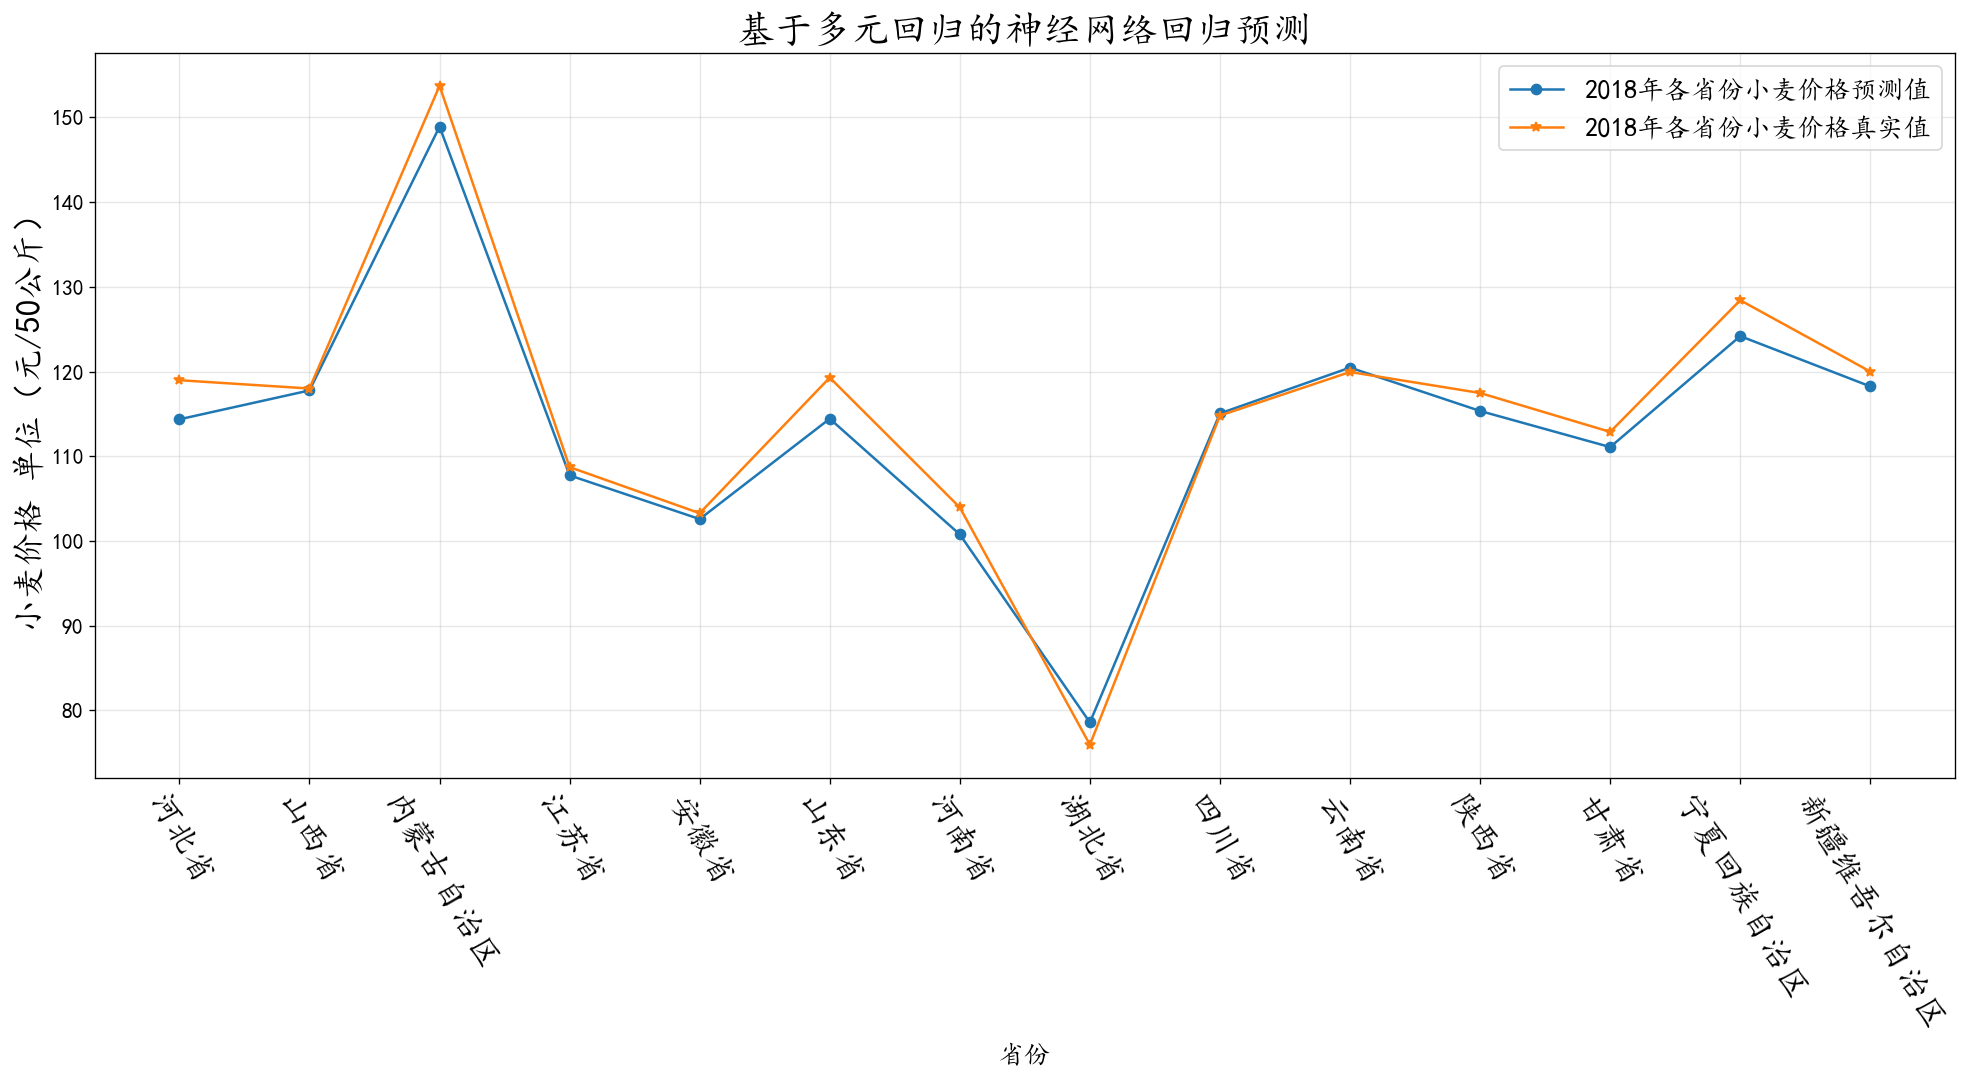

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
x_lim = MultipleLocator(1)

plt.figure(figsize=(20,8), dpi=120)
plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams['axes.unicode_minus'] = False

a = np.arange(len(y_test))
b = np.arange(len(linear_pred))

plt.figure(figsize=(20,8), dpi=120)
plt.plot(a, y_scaler.inverse_transform(bp_pred), marker='o', label='2018年各省份小麦价格预测值')
plt.plot(b, y_scaler.inverse_transform(y_test), marker='*', label='2018年各省份小麦价格真实值')
plt.title('基于多元回归的神经网络回归预测', fontsize=23)
plt.legend(fontsize=16)
plt.xticks(range(len(Test_data['地区'].values)), Test_data['地区'].values, fontsize=20, rotation=300)
plt.yticks(fontsize=13)

plt.xlabel("省份",fontsize=16)
plt.ylabel("小麦价格 单位（元/50公斤）", fontsize=20)
plt.grid(alpha=0.3)

# plt.savefig('基于多元回归的神经网络回归预测.png')
plt.show()

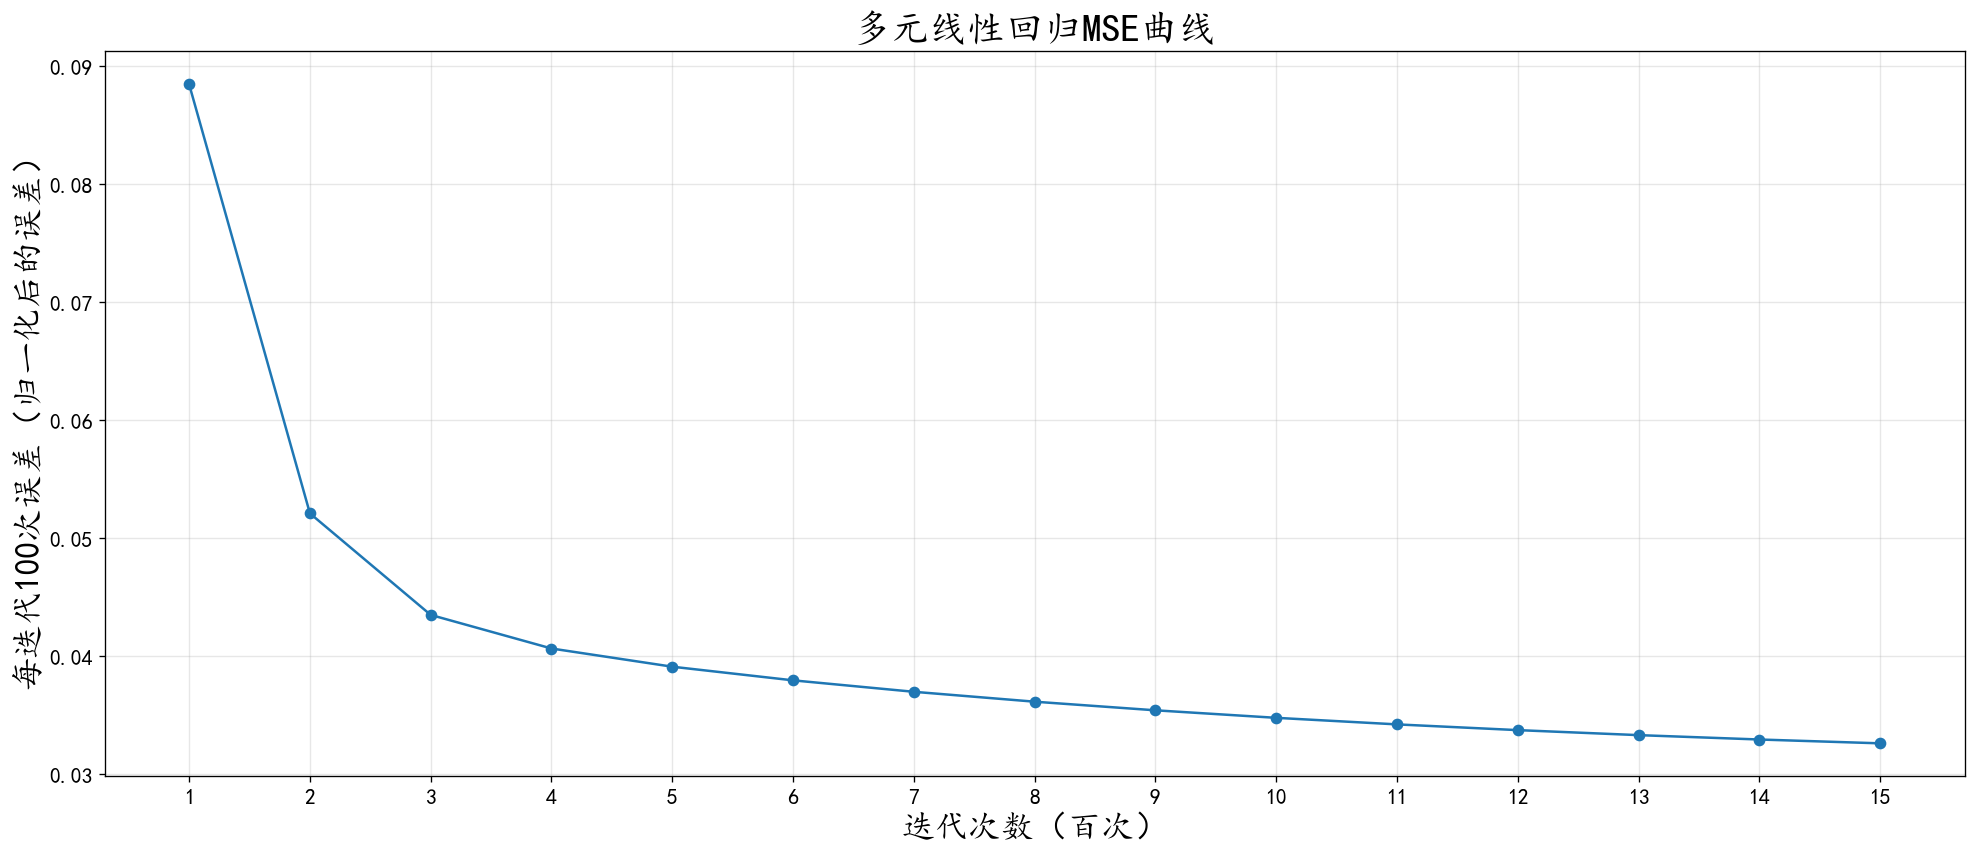

In [18]:
plt.figure(figsize=(20,8), dpi=120)

a = np.arange(len(loss_lin))
a = [i+1 for i in a]

plt.plot(a, loss_lin, marker='o')
plt.title('多元线性回归MSE曲线', fontsize=23)
plt.xticks(a, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel("迭代次数（百次）", fontsize=20)
plt.ylabel("每迭代100次误差（归一化后的误差）", fontsize=20)
plt.grid(alpha=0.3)

# plt.savefig('多元线性回归误差曲线.png')
plt.show()

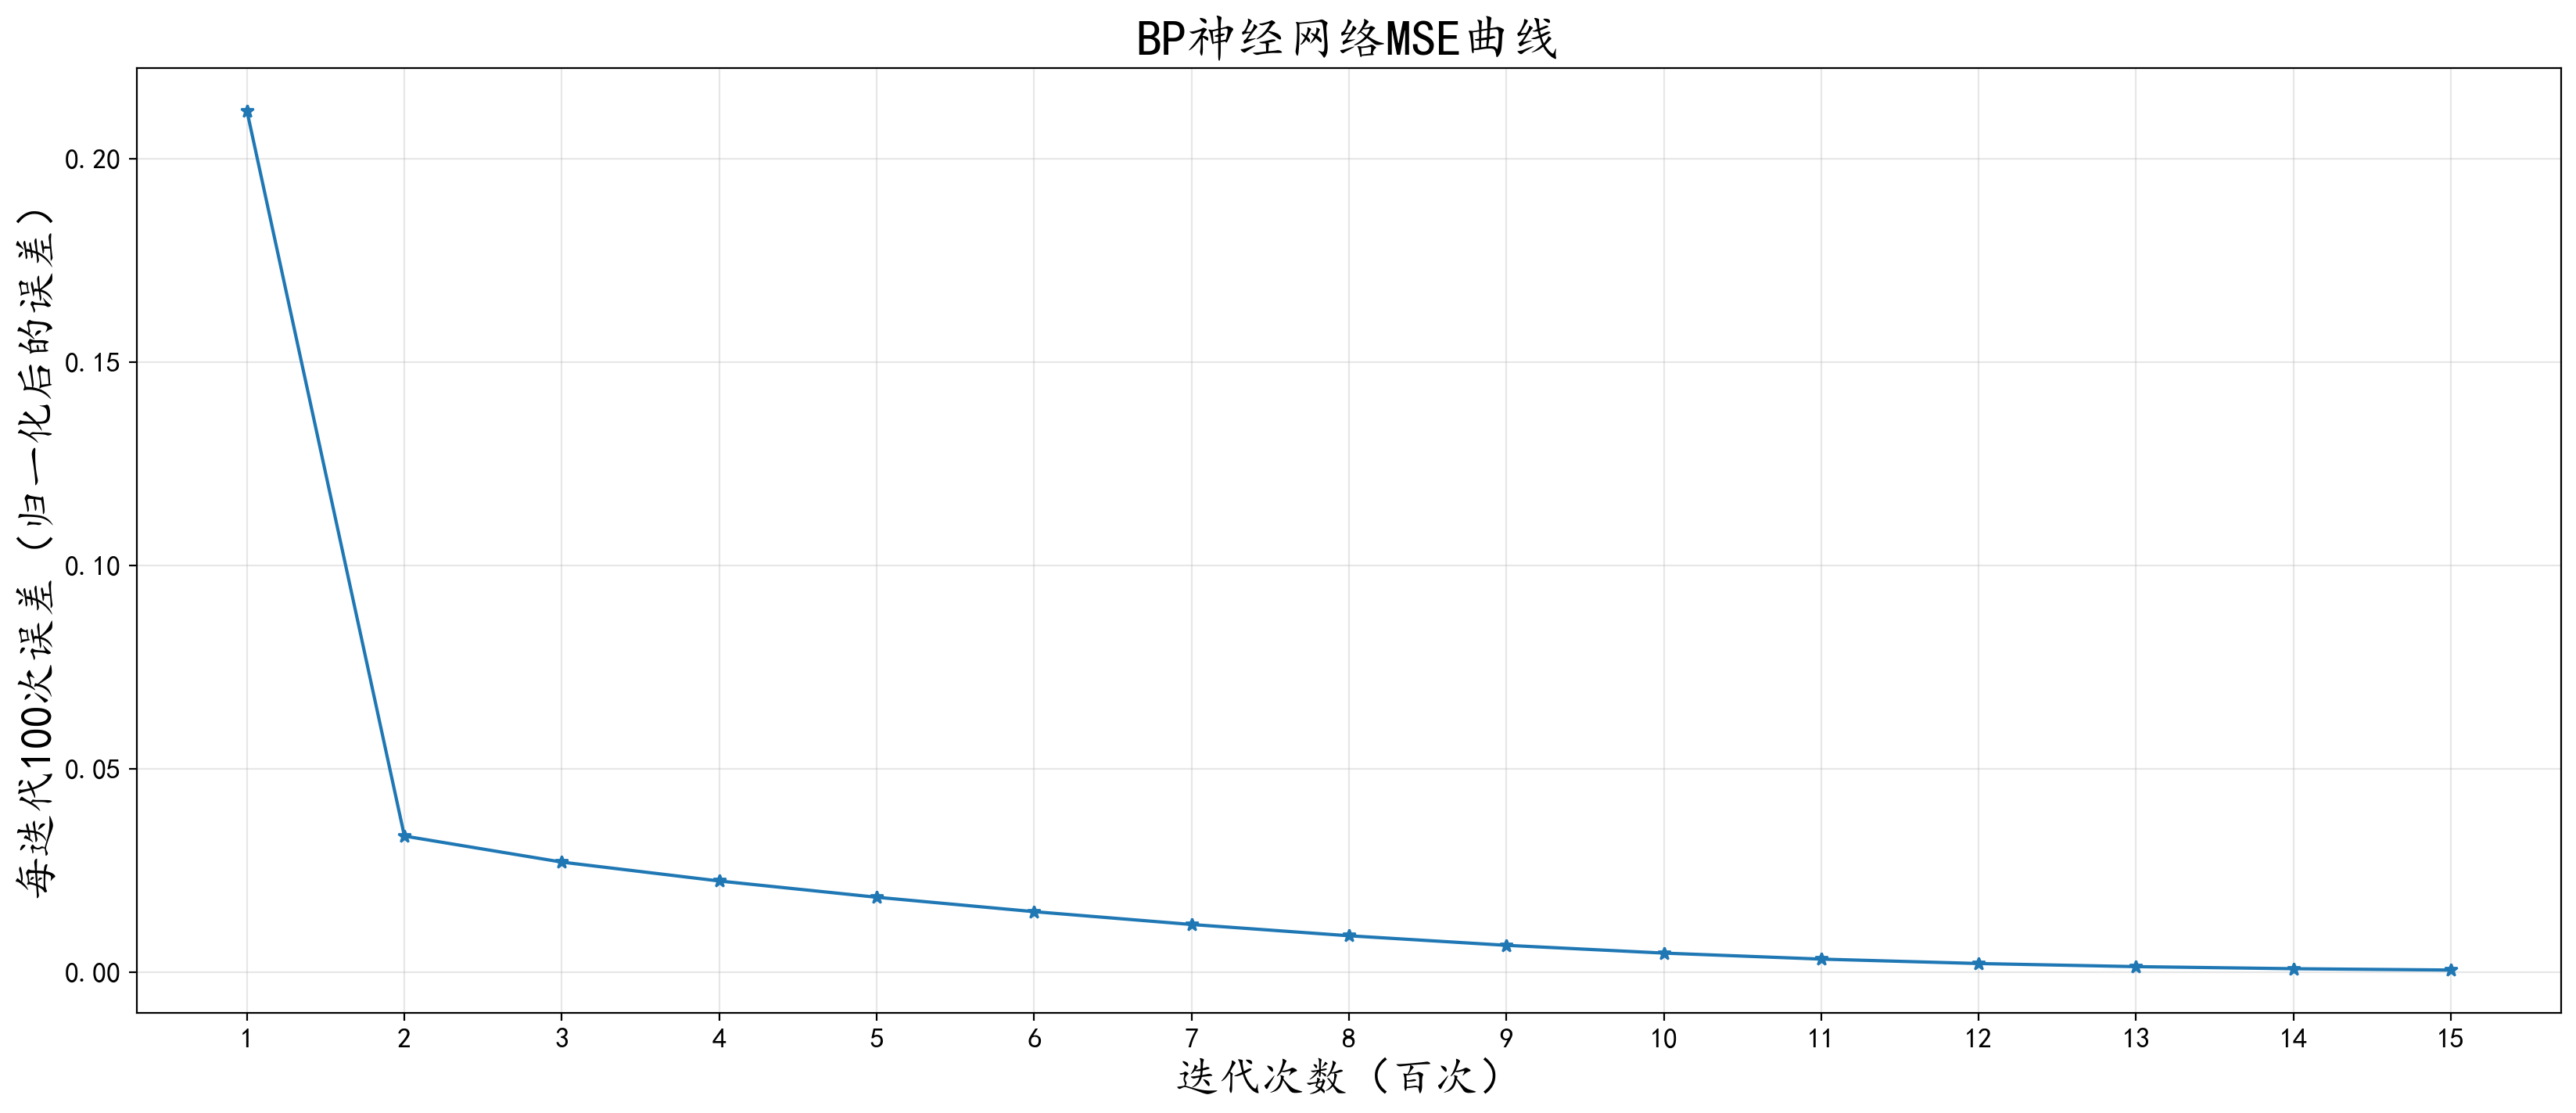

In [19]:
plt.figure(figsize=(20,8), dpi=200)
# a = [i*10 for i in loss_bp]
a = np.arange(len(loss_bp))
a = [i+1 for i in a]
# range(len(loss_bp))
plt.plot(a, loss_bp, marker='*')
plt.title('BP神经网络MSE曲线', fontsize=23)
plt.xticks(a, fontsize=13)
plt.yticks(fontsize=13)


plt.grid(alpha=0.3)

plt.xlabel("迭代次数（百次）", fontsize=20)
plt.ylabel("每迭代100次误差（归一化后的误差）", fontsize=20)



# plt.savefig('BP神经网络误差曲线.png')
plt.show()

In [20]:
for p in linear_model.parameters():
    print(p)
    
for p in bp_model.parameters():
    print(p)

Parameter containing:
tensor([[-0.1794, -0.1761,  0.1516, -0.0902]], requires_grad=True)
Parameter containing:
tensor([0.4112], requires_grad=True)
Parameter containing:
tensor([[ 0.3064, -0.0321,  0.2313, -0.1975,  0.4321,  0.6943],
        [ 0.0344, -0.3681, -0.3184,  0.3733,  0.0655, -0.4032],
        [-0.3485,  0.3553,  0.2493,  0.2231, -0.4160,  0.2957],
        [-0.0479, -0.0120, -0.1557,  0.2712, -0.2395,  0.3500],
        [ 0.3299,  0.2315, -0.0514,  0.0742, -0.0385, -0.0274],
        [-0.3366,  0.3887, -0.1183, -0.3078, -0.0948,  0.2417],
        [-0.1782, -0.4029,  0.1512, -0.1778,  0.1840,  0.1285],
        [-0.0913,  0.2954, -0.1557,  0.0792,  0.2910, -0.3376],
        [ 0.0826,  0.0599,  0.0624, -0.0394, -0.3344, -0.3406],
        [ 0.4161,  0.1885,  0.0384, -0.0721, -0.3384, -0.3999],
        [-0.1105, -0.1906,  0.3291,  0.0969, -0.3121,  0.0064],
        [-0.0331,  0.3687,  0.3654,  0.0117,  0.0599, -0.2457]],
       requires_grad=True)
Parameter containing:
tensor([ 0.3

In [21]:
print(linear_model)

LinearRegression(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


In [22]:
print(bp_model)

BPNetwork(
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (re1): ReLU()
  (fc2): Linear(in_features=12, out_features=1, bias=True)
)
